In [12]:
import json
from meta import analyze_collection
from pathlib import Path
from nilearn import plotting as niplt
from nilearn import input_data
from nimare.dataset import Dataset
import pandas as pd
import seaborn as sns
%matplotlib inline

Exploring single dataset varability of meta-analytic effects

In [2]:
roi_coords = [(27, -53, -9), (42, -52, -24), (-45, -57, -12), (-57, -45, -12)]
labels = [
    'PPA',
    'FFA',
    'vWFA-apriori',
    'vWFA-data'
    ]

In [3]:
def extract_rois(dataset, labels, roi_coords, radius=8):
    masker = input_data.NiftiSpheresMasker(roi_coords, radius=radius)
    
    dataset_level_t = []
    for ix, i in enumerate(dataset.images['t']):
        study_id = dataset.images['study_id'][ix]
        roi_values = masker.fit_transform(i)[0]
        dataset_level_t.append(dict(zip(['study_id'] + labels, [study_id] + roi_values.tolist())))
    dataset_level_t = pd.DataFrame(dataset_level_t).melt(var_name='ROI', value_name='t', id_vars=['study_id'])
    
    return dataset_level_t

#### 1) Building

In [4]:
effect = 'building'

In [5]:
single_pred = json.load((Path('../models') / 'single_predictor.json').open())

In [15]:
building_meta_map = 'ma-maps/building-building.nii.gz'

/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  "Non-finite values detected. "


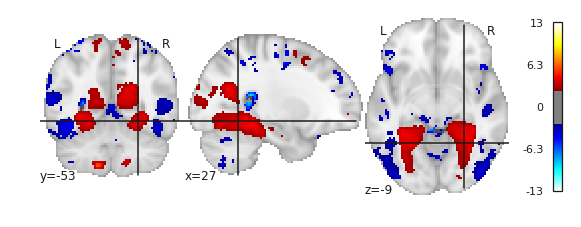

In [16]:
niplt.plot_stat_map(building_meta_map, cut_coords=roi_coords[0], threshold=2.58)

In [171]:
mean_t = masker.fit_transform(building_meta_map)

In [13]:
building_dataset_level_t = extract_rois(
    Dataset.load('./datasets/building_dset.pkl'),
    labels,
    roi_coords,
    8
)

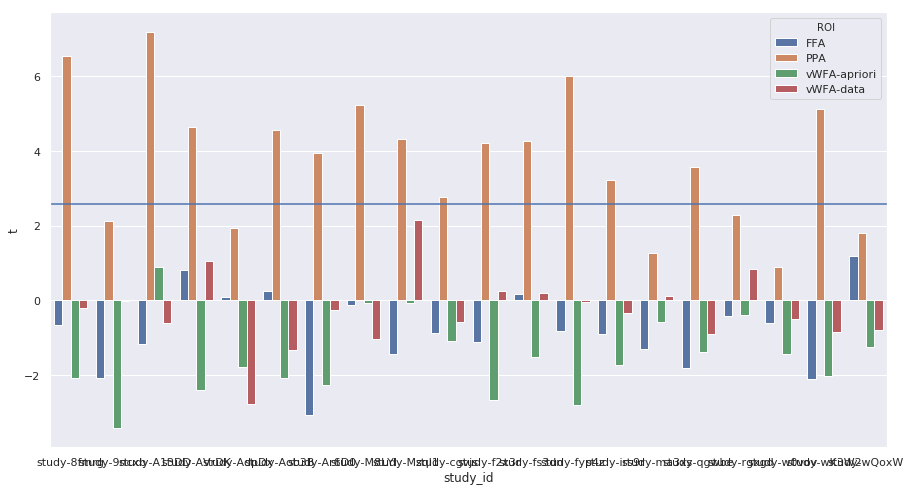

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x='study_id', y='t', hue='ROI', data=building_dataset_level_t)
p.axhline(2.58)

#### 2) faces

In [20]:
faces_meta_map = 'ma-maps/any_faces+speech+shot_change+log_mean_face_time_cum-anyFaces.nii.gz'
faces_dataset = Dataset.load('./datasets/any_faces+speech+shot_change+log_mean_face_time_cum_dset.pkl')

In [ ]:
faces_dataset_level_t = extract_rois(
    faces_dataset,
    labels,
    roi_coords,
    8
)

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x='study_id', y='t', hue='ROI', data=faces_dataset_level_t)
p.axhline(2.58)

3) frequency

In [199]:
freq_meta_map = 'ma-maps/subtlexusfrequency_Lg10WF+speech-subtlexusfrequencyLg10Wf.nii.gz'
frequency_dataset = Dataset.load('./datasets/subtlexusfrequency_Lg10WF_dset.pkl')

In [206]:
frequency_dataset_level_t = extract_rois(
    frequency_dataset,
    labels,
    roi_coords,
    8
)

In [210]:
frequency_dataset.images

,id,study_id,contrast_id,beta,t,varcope,beta__relative,t__relative,varcope__relative
0,study-3brro-subtlexusfrequencyLg10Wf,study-3brro,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11795_id-680582_task-tunnel_space-M...,collection-11795_id-680575_task-tunnel_space-M...,collection-11795_id-680589_task-tunnel_space-M...
1,study-3i2kt-subtlexusfrequencyLg10Wf,study-3i2kt,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11775_id-665315_task-story_space-MN...,collection-11775_id-665296_task-story_space-MN...,collection-11775_id-665335_task-story_space-MN...
2,study-3jq66-subtlexusfrequencyLg10Wf,study-3jq66,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11788_id-674798_task-backtothefutur...,collection-11788_id-674794_task-backtothefutur...,collection-11788_id-674803_task-backtothefutur...
3,study-435bn-subtlexusfrequencyLg10Wf,study-435bn,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11772_id-659458_task-movie_space-MN...,collection-11772_id-659460_task-movie_space-MN...,collection-11772_id-659445_task-movie_space-MN...
4,study-5j3y6-subtlexusfrequencyLg10Wf,study-5j3y6,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11778_id-669239_task-sherlock_space...,collection-11778_id-669226_task-sherlock_space...,collection-11778_id-669246_task-sherlock_space...
5,study-5w6hu-subtlexusfrequencyLg10Wf,study-5w6hu,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11774_id-663005_task-perception_spa...,collection-11774_id-662986_task-perception_spa...,collection-11774_id-662990_task-perception_spa...
6,study-5we9i-subtlexusfrequencyLg10Wf,study-5we9i,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11764_id-653697_task-merlin_space-M...,collection-11764_id-653686_task-merlin_space-M...,collection-11764_id-653696_task-merlin_space-M...
7,study-6c5rs-subtlexusfrequencyLg10Wf,study-6c5rs,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11766_id-654583_task-schema_space-M...,collection-11766_id-654563_task-schema_space-M...,collection-11766_id-654581_task-schema_space-M...
8,study-6th6w-subtlexusfrequencyLg10Wf,study-6th6w,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11740_id-615545_task-forgot_space-M...,collection-11740_id-615543_task-forgot_space-M...,collection-11740_id-615553_task-forgot_space-M...
9,study-7ioc8-subtlexusfrequencyLg10Wf,study-7ioc8,subtlexusfrequencyLg10Wf,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,/home/alejandro/repos/neuroscout-paper/meta/im...,collection-11737_id-613737_task-lucy_space-MNI...,collection-11737_id-613729_task-lucy_space-MNI...,collection-11737_id-613738_task-lucy_space-MNI...


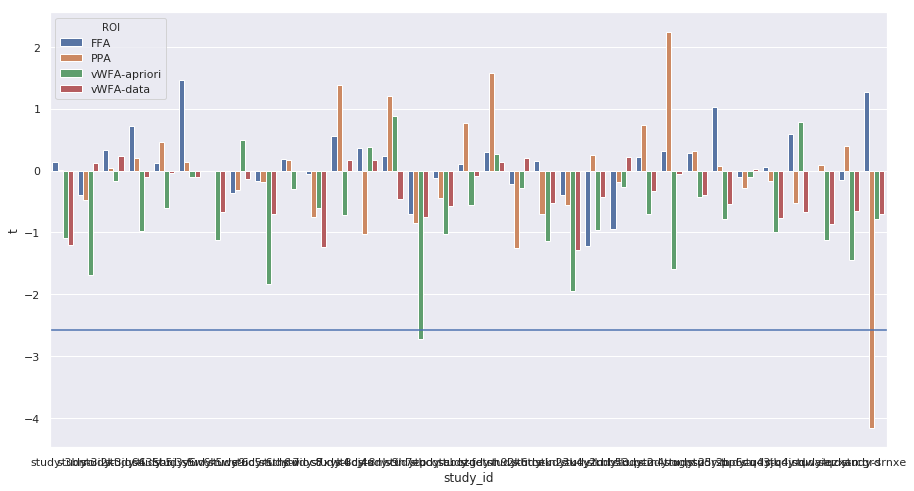

In [207]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x='study_id', y='t', hue='ROI', data=frequency_dataset_level_t)
p.axhline(-2.58)

In [203]:
frequency_dataset_level_t_1 = extract_rois(
    frequency_dataset,
    labels,
    roi_coords,
    1
)

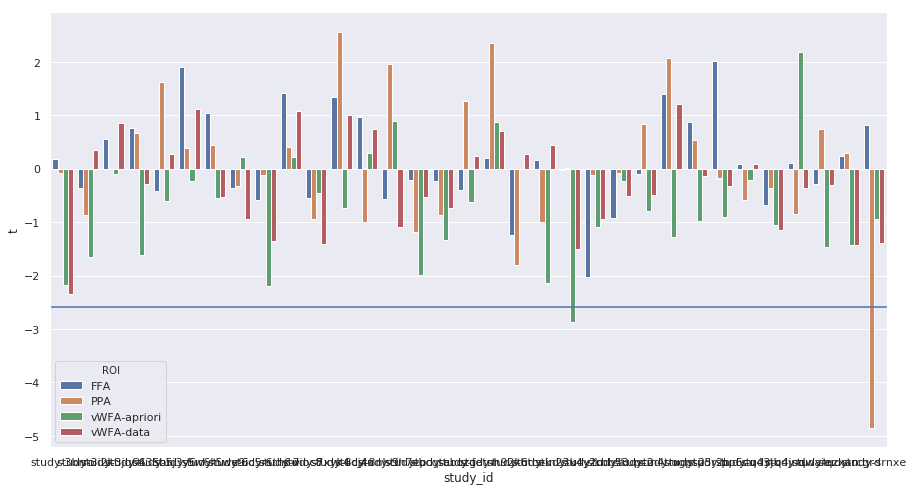

In [205]:
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.barplot(x='study_id', y='t', hue='ROI', data=frequency_dataset_level_t_1)
p.axhline(-2.58)

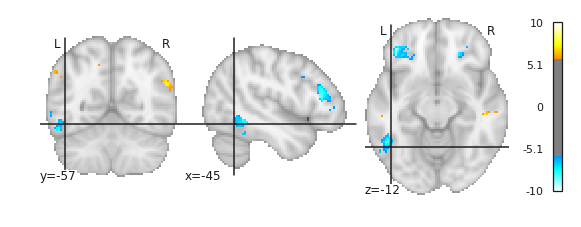

In [195]:
niplt.plot_stat_map(freq_meta_map, cut_coords=roi_coords[2], threshold=6)